In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

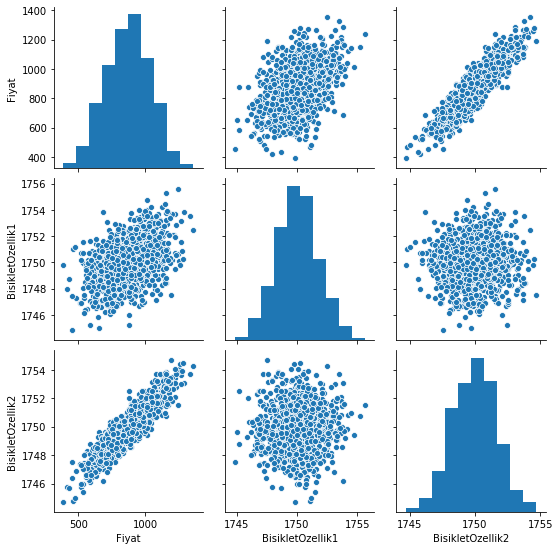

In [5]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ikiye ayırmak

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(670, 2)

In [10]:
x_test.shape

(330, 2)

In [11]:
y_train.shape

(670,)

In [12]:
y_test.shape

(330,)

In [13]:
#scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")

In [22]:
model.fit(x_train,y_train,epochs=250)

Train on 670 samples
Epoch 1/250
670/670 [==============================] - 1s 1ms/sample - loss: 795895.9134
Epoch 2/250
670/670 [==============================] - 0s 50us/sample - loss: 795754.8935
Epoch 3/250
670/670 [==============================] - 0s 47us/sample - loss: 795628.2709
Epoch 4/250
670/670 [==============================] - 0s 47us/sample - loss: 795503.7696
Epoch 5/250
670/670 [==============================] - 0s 47us/sample - loss: 795366.9789
Epoch 6/250
670/670 [==============================] - 0s 47us/sample - loss: 795216.5517
Epoch 7/250
670/670 [==============================] - 0s 48us/sample - loss: 795051.8409
Epoch 8/250
670/670 [==============================] - 0s 47us/sample - loss: 794872.1590
Epoch 9/250
670/670 [==============================] - 0s 46us/sample - loss: 794675.4231
Epoch 10/250
670/670 [==============================] - 0s 46us/sample - loss: 794459.8364
Epoch 11/250
670/670 [==============================] - 0s 46us/sample - loss: 

670/670 [==============================] - 0s 45us/sample - loss: 513208.3162
Epoch 91/250
670/670 [==============================] - 0s 43us/sample - loss: 504007.3252
Epoch 92/250
670/670 [==============================] - 0s 42us/sample - loss: 494643.2957
Epoch 93/250
670/670 [==============================] - 0s 42us/sample - loss: 485123.4325
Epoch 94/250
670/670 [==============================] - 0s 41us/sample - loss: 475444.5193
Epoch 95/250
670/670 [==============================] - 0s 41us/sample - loss: 465645.8094
Epoch 96/250
670/670 [==============================] - 0s 41us/sample - loss: 455646.3583
Epoch 97/250
670/670 [==============================] - 0s 41us/sample - loss: 445530.1311
Epoch 98/250
670/670 [==============================] - 0s 41us/sample - loss: 435242.2110
Epoch 99/250
670/670 [==============================] - 0s 41us/sample - loss: 424763.1027
Epoch 100/250
670/670 [==============================] - 0s 41us/sample - loss: 414261.7255
Epoch 101/2

670/670 [==============================] - 0s 48us/sample - loss: 2969.4847
Epoch 181/250
670/670 [==============================] - 0s 46us/sample - loss: 2917.0121
Epoch 182/250
670/670 [==============================] - 0s 44us/sample - loss: 2866.2660
Epoch 183/250
670/670 [==============================] - 0s 44us/sample - loss: 2819.5755
Epoch 184/250
670/670 [==============================] - 0s 45us/sample - loss: 2768.6268
Epoch 185/250
670/670 [==============================] - 0s 42us/sample - loss: 2726.2738
Epoch 186/250
670/670 [==============================] - 0s 42us/sample - loss: 2678.9498
Epoch 187/250
670/670 [==============================] - 0s 43us/sample - loss: 2632.4840
Epoch 188/250
670/670 [==============================] - 0s 44us/sample - loss: 2593.1119
Epoch 189/250
670/670 [==============================] - 0s 45us/sample - loss: 2543.5455
Epoch 190/250
670/670 [==============================] - 0s 44us/sample - loss: 2494.6992
Epoch 191/250
670/670 [=

In [23]:
loss = model.history.history["loss"]

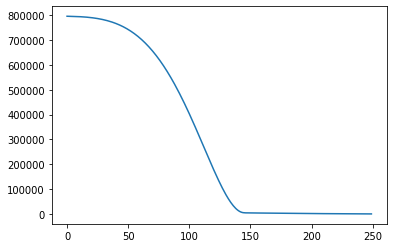

In [24]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [25]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [26]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [27]:
trainLoss

516.4895447688316

In [28]:
testLoss

506.748486328125

In [29]:
testTahminleri = model.predict(x_test)

In [30]:
testTahminleri

array([[1056.5616 ],
       [ 659.1396 ],
       [ 879.8033 ],
       [ 897.2417 ],
       [ 902.1072 ],
       [ 510.9165 ],
       [ 928.5295 ],
       [ 981.5555 ],
       [ 935.8912 ],
       [1003.3185 ],
       [ 770.24536],
       [ 915.6222 ],
       [ 943.631  ],
       [1036.117  ],
       [1093.5881 ],
       [ 710.34106],
       [1100.7997 ],
       [ 684.7312 ],
       [1125.1798 ],
       [ 889.00104],
       [ 894.81604],
       [ 739.6898 ],
       [ 512.04803],
       [ 650.5987 ],
       [ 843.5318 ],
       [1067.7294 ],
       [ 738.5338 ],
       [ 776.31476],
       [ 878.6393 ],
       [ 788.24274],
       [ 509.20975],
       [ 798.1173 ],
       [ 751.0147 ],
       [ 680.25684],
       [ 889.781  ],
       [ 852.129  ],
       [1019.52167],
       [1009.46173],
       [ 852.4792 ],
       [ 868.50354],
       [ 775.8998 ],
       [1142.0702 ],
       [1073.9359 ],
       [1065.1575 ],
       [ 876.2076 ],
       [ 635.56024],
       [1117.6466 ],
       [ 965.

In [31]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [32]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [33]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [34]:
testTahminleri

0      1056.561646
1       659.139587
2       879.803284
3       897.241699
4       902.107178
          ...     
325    1000.059692
326     806.428772
327     783.238037
328    1134.709473
329     817.361389
Length: 330, dtype: float32

In [35]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [36]:
tahminDf

,Gerçek Y,0
0,1081.652164,1056.561646
1,622.675990,659.139587
2,889.356810,879.803284
3,902.826733,897.241699
4,897.662404,902.107178
...,...,...
325,1028.438035,1000.059692
326,789.934950,806.428772
327,758.490486,783.238037
328,1172.871659,1134.709473


In [37]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [38]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1056.561646
1,622.675990,659.139587
2,889.356810,879.803284
3,902.826733,897.241699
4,897.662404,902.107178
...,...,...
325,1028.438035,1000.059692
326,789.934950,806.428772
327,758.490486,783.238037
328,1172.871659,1134.709473


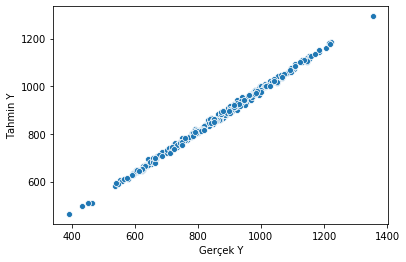

In [39]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

18.037772147916666

In [42]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

506.7484460343649

In [43]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [65]:
yeniBisikletOzellikleri = [[1751,1750]]

In [66]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [67]:
model.predict(yeniBisikletOzellikleri)

array([[913.2747]], dtype=float32)

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save("bisiklet_modeli.h5")

In [70]:
sonradanCagirilanModel= load_model("bisiklet_modeli.h5")

In [71]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

array([[913.2747]], dtype=float32)